In [1]:
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
import utils.experiment_utils as exp 
import utils.plot_utils as plot

In [2]:
FKL_DATA_DIR = "/home/samuel/Documents/Actor-Expert/RLControl/results/Pendulum-v0_forward_klresults"
AE_DATA_DIR = "/home/samuel/Documents/Actor-Expert/RLControl/results/Pendulum-v0_aeresults"
RKL_DATA_DIR = "/home/samuel/Documents/Actor-Expert/RLControl/results/Pendulum-v0_reverse_klresults"
DATA_FILE = "data.pkl"

# Get data
with open(os.path.join(FKL_DATA_DIR, DATA_FILE), "rb") as in_file:
    data_fkl = pickle.load(in_file)
with open(os.path.join(AE_DATA_DIR, DATA_FILE), "rb") as in_file:
    data_ae = pickle.load(in_file)
with open(os.path.join(RKL_DATA_DIR, DATA_FILE), "rb") as in_file:
    data_rkl = pickle.load(in_file)

In [3]:
len(data_ae["experiment_data"].keys())

16

In [4]:
hp_returns = exp.get_best_hp(data_fkl, "eval", after=0)
print(hp_returns[-5:])

hp_returns = exp.get_best_hp(data_ae, "eval", after=0)
print(hp_returns[-5:])

hp_returns = exp.get_best_hp(data_rkl, "eval", after=0)
print(hp_returns[-10:])

((19, -181.18048436377856), (10, -181.04537472115973), (0, -180.1086606262482), (9, -178.02861992504089), (18, -174.7213731458829))
((7, -450.1456723849278), (10, -216.45497500129875), (11, -216.40310474115108), (15, -210.86173639371742), (14, -180.32171798590426))
((4, -474.6405942152839), (5, -457.9279849866135), (2, -431.70688599980605), (1, -342.7578240532044), (12, nan), (27, nan), (3, nan), (30, nan), (31, nan), (24, nan))


In [5]:
# data["experiment_data"][0]["runs"][0]

(<Figure size 864x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Average Eval Return per Run with Standard Error'}, xlabel='Timesteps', ylabel='Average Return'>)

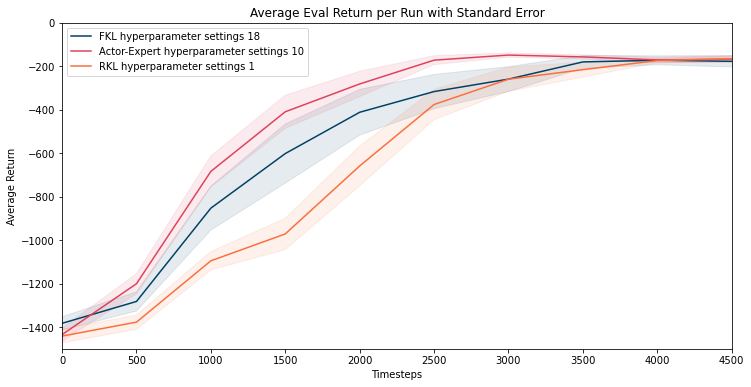

In [6]:
plot.plot_mean_with_stderr([data_fkl, data_ae, data_rkl], "eval", [[18], [10], [1]], smooth_over=[2, 2, 2], names=["FKL", "Actor-Expert", "RKL"], xlim=[0, 4500], ylim=[-1500, 0], colours=[["#004165"], ["#de425b"], ["#fc6f3c"]], alpha=0.1)


(<Figure size 864x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Average Eval Return per Run with Standard Error'}, xlabel='Timesteps', ylabel='Average Return'>)

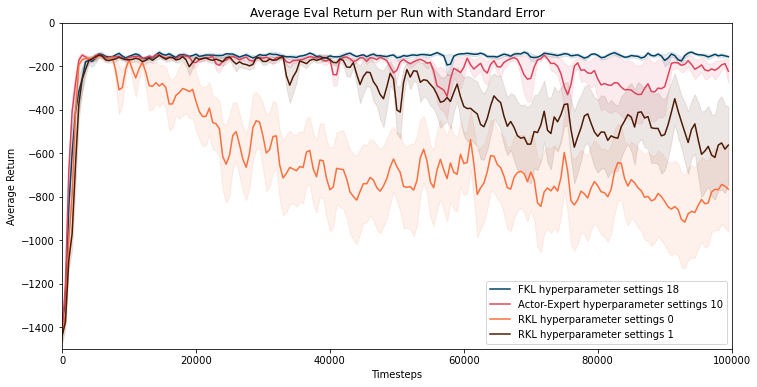

In [7]:
# Plot the mean return per run, smoothing over the passed 10,000 time steps
plot.plot_mean_with_stderr([data_fkl, data_ae, data_rkl], "eval", [[18], [10], [0, 1]], smooth_over=[2, 2, 2], names=["FKL", "Actor-Expert", "RKL"], xlim=[0, 100000], ylim=[-1500, 0], colours=[["#004165"], ["#de425b"], ["#fc6f3c", "#4d1a04"]], alpha=0.1)


(<Figure size 864x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Mean Return with Runs'}, xlabel='Timesteps', ylabel='Return'>)

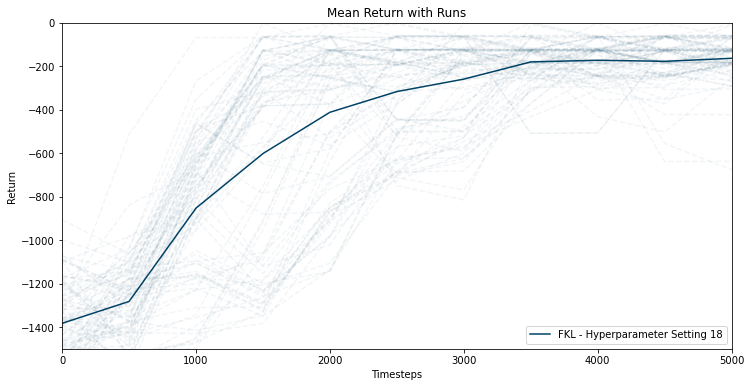

In [8]:
plot.plot_mean_with_runs([data_fkl], "eval", [[18]], colours=[["#004165"]], smooth_over=[2], names=["FKL"], xlim=[0, 5000],
ylim=[-1500, 0], alpha=0.05)


(<Figure size 864x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Mean Return with Runs'}, xlabel='Timesteps', ylabel='Return'>)

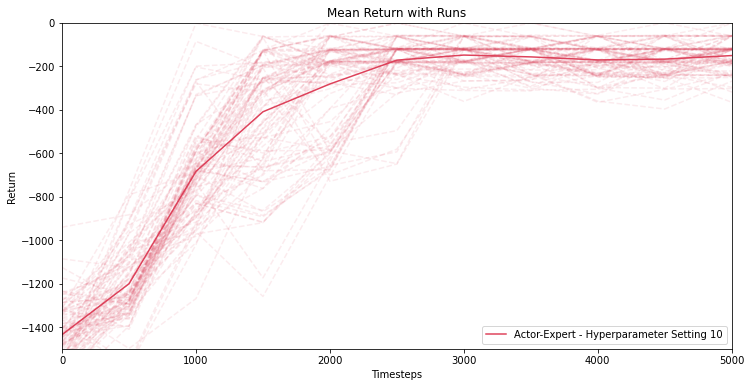

In [9]:
plot.plot_mean_with_runs([data_ae], "eval", [[10]], colours=[["#de425b"]], smooth_over=[2], names=["Actor-Expert"], xlim=[0, 5000],
ylim=[-1500, 0], alpha=0.1)


(<Figure size 864x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Mean Return with Runs'}, xlabel='Timesteps', ylabel='Return'>)

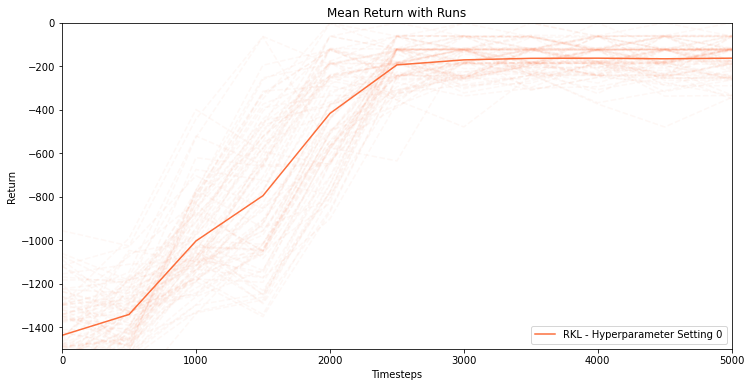

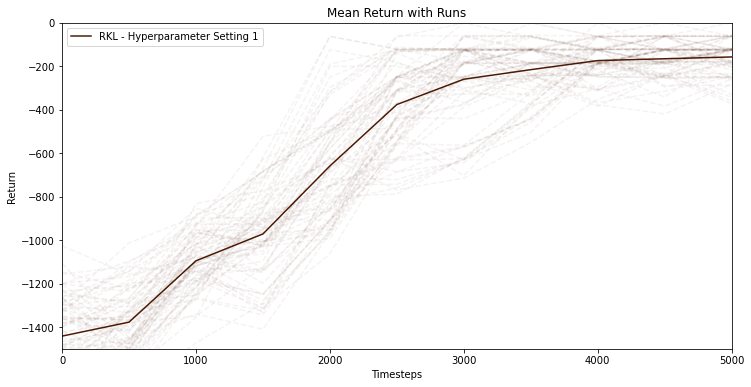

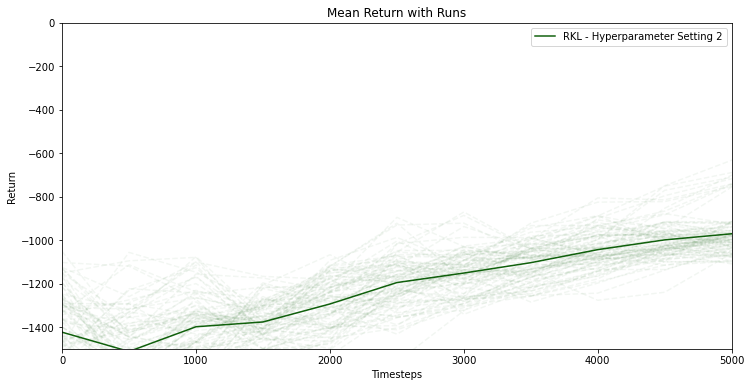

In [10]:
plot.plot_mean_with_runs([data_rkl], "eval", [[0]], colours=[["#fc6f3c"]], smooth_over=[2], names=["RKL"], xlim=[0, 5000],
ylim=[-1500, 0], alpha=0.05)

plot.plot_mean_with_runs([data_rkl], "eval", [[1]], colours=[["#4d1a04"]], smooth_over=[2], names=["RKL"], xlim=[0, 5000],
ylim=[-1500, 0], alpha=0.05)

plot.plot_mean_with_runs([data_rkl], "eval", [[2]], colours=[["#10600c"]], smooth_over=[2], names=["RKL"], xlim=[0, 5000],
ylim=[-1500, 0], alpha=0.05)

(<Figure size 864x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Mean Return with Runs'}, xlabel='Timesteps', ylabel='Return'>)

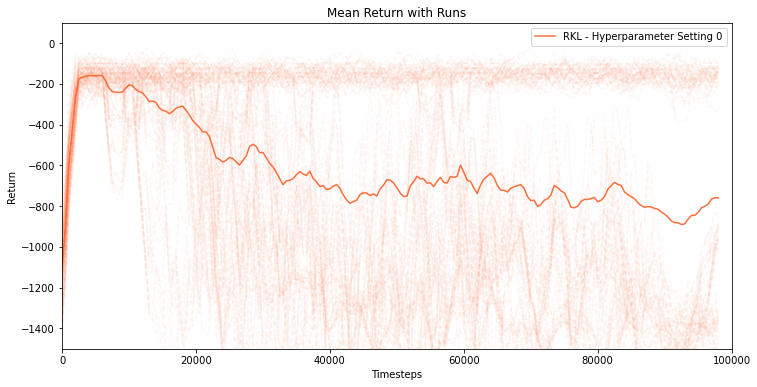

In [11]:
plot.plot_mean_with_runs([data_rkl], "eval", [[0]], colours=[["#fc6f3c"]], smooth_over=[5], names=["RKL"], xlim=[0, 100000],
ylim=[-1500, 100], alpha=0.05)

(<Figure size 864x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Mean Return with Runs'}, xlabel='Timesteps', ylabel='Return'>)

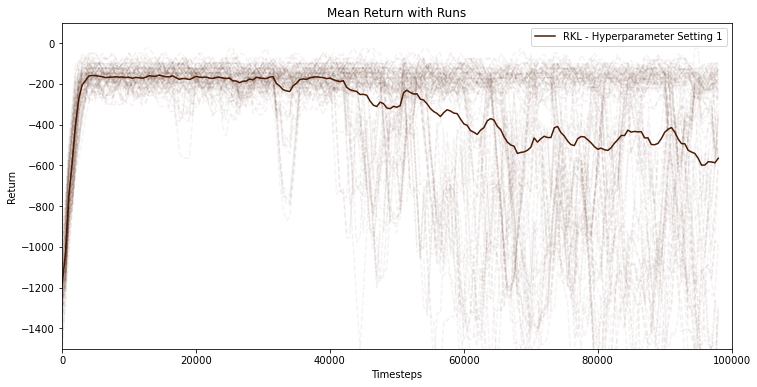

In [12]:
plot.plot_mean_with_runs([data_rkl], "eval", [[1]], colours=[["#4d1a04"]], smooth_over=[5], names=["RKL"], xlim=[0, 100000],
ylim=[-1500, 100], alpha=0.05)

(<Figure size 864x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Mean Return with Runs'}, xlabel='Timesteps', ylabel='Return'>)

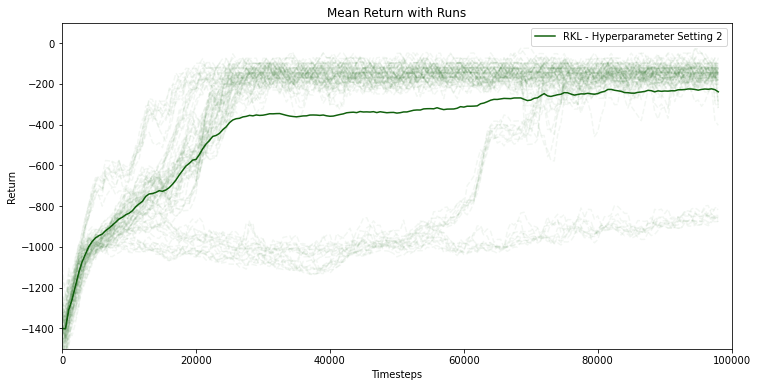

In [13]:
plot.plot_mean_with_runs([data_rkl], "eval", [[2]], colours=[["#10600c"]], smooth_over=[5], names=["RKL"], xlim=[0, 100000],
ylim=[-1500, 100], alpha=0.05)
